# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
import json

In [6]:
# Fetch current BTC price
response_BTC_data = requests.get(btc_url)
BTC_data = response_BTC_data.json()

# Fetch current ETH price
response_ETH_data = requests.get(eth_url)
ETH_data = response_ETH_data.json()

# Compute current value of my crypto
BTC_price = BTC_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = BTC_price * my_btc

ETH_price = ETH_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = ETH_price *my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${round(my_btc_value,2):,}")
print(f"The current value of your {my_eth} ETH is ${round(my_eth_value,2):,}")

The current value of your 1.2 BTC is $47,412.0
The current value of your 5.3 ETH is $15,747.31


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_api_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_api_key,
    api_version="v2"
)

In [42]:
# ERROR!!!  aks the professor why the date can not be set on today's date!!!!
# Format current date as ISO format
today = pd.Timestamp("2021-11-04", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = portfolio[portfolio["symbol"]== "AGG"].drop("symbol",axis=1)
SPY = portfolio[portfolio["symbol"]== "SPY"].drop("symbol",axis=1)

# Concatenate the ticker DataFrames
portfolio = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
portfolio.index = portfolio.index.date
portfolio

AGG                                                           \
              open    high     low   close   volume trade_count        vwap   
2021-11-04  114.51  114.84  114.48  114.77  6618091       22404  114.696231   

               SPY                                                           
              open   high     low   close    volume trade_count        vwap  
2021-11-04  465.38  467.0  464.99  466.91  53054747      386771  465.966904

In [10]:
# Pick AGG and SPY close prices
agg_closing_price = float(portfolio["AGG"]["close"])
spy_closing_price = float(portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing_price}")
print(f"Current SPY closing price: ${spy_closing_price}")

Current AGG closing price: $114.77
Current SPY closing price: $466.91


In [11]:
# Compute the current value of shares
my_agg_value = agg_closing_price * my_agg
my_spy_value = spy_closing_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,}")

The current value of your 200 AGG shares is $22,954.0
The current value of your 50 SPY shares is $23,345.5


### Savings Health Analysis

In [84]:
# Set monthly household income
monthly_income = 12000
crypto_portfolio = my_btc_value + my_eth_value
stockbond_portfolio = my_agg_value + my_spy_value

# Consolidate financial assets data
#asset_data = {"Amount":(crypto_portfolio,stockbond_portfolio)}

asset_data = {"Amount":(crypto_portfolio, stockbond_portfolio)}

# Create savings DataFrame
df_savings = pd.DataFrame(asset_data, index=["Crypto", "Shares"])

# Display savings DataFrame
df_savings

,Amount
Crypto,63159.307
Shares,46299.500


<AxesSubplot:title={'center':'Savings'}, ylabel='Amount'>

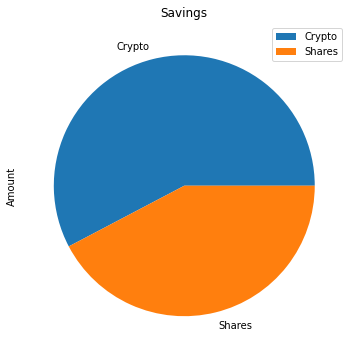

In [85]:

# Plot savings pie chart 

df_savings.plot.pie(y="Amount", title = "Savings", figsize=(6,6))



In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
tot_amount_savings = crypto_portfolio + stockbond_portfolio

# Validate saving health
if emergency_fund < tot_amount_savings:
        print("Congratulations! You have a lot money in your emergency fund - Invest smart with DevWealth.al")
elif emergency_fund == tot_amount_savings:
        print("Congratulations! This financial Goal has been reached and if you made it here you can make it to the moon ;)")
else:
        print(f"Be aware that you are $ {emergency_fund - tot_amount_savings} away from reaching this financial goal - tip: watch Money Heist")


Congratulations! You have a lot money in your emergency fund - Invest smart with DevWealth.al


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()


In [53]:

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1Day"



# Reorganize the DataFrame
# Separate ticker data
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])


# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                           SPY                                                 \
                  vwap    open    high     low   close     volume trade_count   
2016-05-02  110.627199  206.90  208.18  206.41  208.03   61908515      263580   
2016-05-03  110.865995  206.50  206.80  205.28  206.13  106422142      377518   
2016-05-04  110.879063  205.00  205.85  204.42  204.96   92199810      345261   
2016-05-05  111.028363  205.57  205.98  204.47  204.95   67597222      280622   
2016-05-06  111.031967  204.04  205.77  203.88  205.70   89131004      340335   

                        
                  vwap  
2016-05-02  207.294812  
2016-05-03  206.312060  
2016-05-04  205.090172  
2016-05-05  205.141555  
2016-05-06  204.937074

In [54]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forty_sixty = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

In [55]:
# Printing the simulation input data
MC_forty_sixty.portfolio_data

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   
...            ...       ...       ...     ...      ...         ...   
2021-04-26  114.74  114.8015  114.6500  114.65  3480337       13521   
2021-04-27  114.60  115.1300  114.3700  114.37  3820640       12720   
2021-04-28  114.45  114.4685  114.2000  114.43  7075831       24303   
2021-04-29  114.14  114.3700  114.0900  114.37  6208142       21096   
2021-04-30  114.41  114.5150  114.3300  114.49  6469432       19582   

                                        SPY                            \
                  vwap daily_return    open    high       low   close   
2016-05-02  110.627199          NaN  206.90  208.18  206.4100  208.03   
2016-05-03  110.865995     0.001808  206.50  206.80  205.2800  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.4200  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.4700  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.8800  205.70   
...                ...          ...     ...     ...       ...     ...   
2021-04-26  114.706244    -0.000871  417.42  418.22  416.8111  417.61   
2021-04-27  114.498315    -0.002442  417.97  418.14  416.3000  417.52   
2021-04-28  114.379810     0.000525  417.84  419.01  416.9000  417.40   
2021-04-29  114.250702    -0.000524  420.38  420.72  416.4400  420.06   
2021-04-30  114.456246     0.001049  417.67  418.54  416.3400  417.30   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659  
...               ...         ...         ...          ...  
2021-04-26   52076360      295872  417.505200     0.002088  
2021-04-27   50324187      296302  417.481280    -0.000216  
2021-04-28   50692843      330050  417.742098    -0.000287  
2021-04-29   77056617      443399  418.825111     0.006373  
2021-04-30   84731942      478844  417.651995    -0.006570  

[1259 rows x 16 columns]

In [56]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forty_sixty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ddevii/Rutgers/Rutgers_Personal_Repo/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002105,0.991882,1.004580,0.992314,1.006696,0.997370,1.013223,1.005017,0.997304,1.007612,...,0.996492,1.009125,1.004557,0.995267,0.996579,0.994798,1.004600,0.999602,1.009486,1.002997
2,1.006243,0.996596,1.006247,0.994175,1.017028,0.996681,1.018589,1.002365,0.992189,1.010393,...,0.995619,1.009358,1.008494,1.001517,1.000140,1.009080,0.998466,0.995401,1.007794,0.994335
3,1.010361,0.991209,1.002187,0.988903,1.015954,1.007367,1.025466,0.998888,0.994554,1.022435,...,0.994208,1.002019,1.015415,1.009169,0.995535,1.006420,1.002696,0.985196,1.000272,0.999688
4,1.009063,0.986840,1.005226,0.976089,1.010484,1.009699,1.020537,1.000246,0.994646,1.013995,...,0.991930,0.987207,1.012203,1.015586,1.004921,1.010540,1.020700,0.988218,0.992758,1.004778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.225635,80.710366,25.219137,23.197058,13.983686,5.100428,9.425493,9.451754,10.991257,8.856281,...,19.223633,22.539253,30.538508,43.913523,9.916070,11.310219,12.071061,11.778184,12.141974,14.875705
7557,20.259033,81.340127,25.213256,23.160375,13.995576,5.096742,9.344796,9.368775,10.989832,8.942531,...,19.238013,22.790145,30.503073,44.225717,9.936485,11.217901,12.126366,11.953319,12.110689,14.780093
7558,20.159085,81.962941,24.985096,23.272385,13.992553,5.103293,9.334201,9.288797,11.050445,8.981905,...,19.294864,22.868343,30.176872,43.766918,9.957778,11.135280,12.028184,11.822502,12.089536,14.803769
7559,20.149830,81.804162,24.825916,23.149525,14.082435,5.072376,9.479449,9.225669,11.001240,8.954776,...,19.480177,22.699592,30.236147,43.367426,9.943840,11.159528,12.328951,11.969645,12.246261,14.739028


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

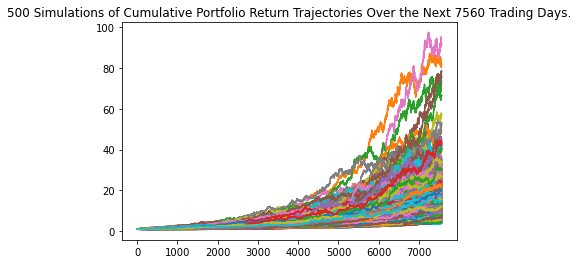

In [57]:
# Plot simulation outcomes
MC_forty_sixty.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

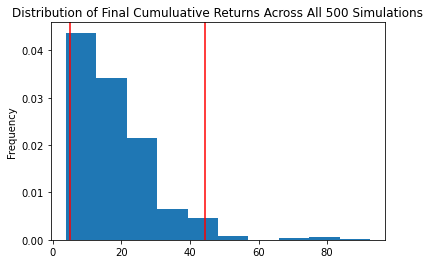

In [58]:
# Plot probability distribution and confidence intervals
MC_forty_sixty.plot_distribution()

### Retirement Analysis

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
forty_sixty_tbl = MC_forty_sixty.summarize_cumulative_return()

# Print summary statistics
print(forty_sixty_tbl)

count           500.000000
mean             18.344617
std              11.888404
min               3.783778
25%              10.092719
50%              15.222329
75%              23.540428
max              92.511951
95% CI Lower      4.908457
95% CI Upper     44.306823
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [60]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(forty_sixty_tbl[8]*20000,2)
ci_upper = round(forty_sixty_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $98,169.15 and $886,136.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [61]:
# Set initial investment
initial_investment = (20000+(20000 * 1/2))

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(forty_sixty_tbl[8]*initial_investment,2)
ci_upper = round(forty_sixty_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $30,000.0 in the portfolio over the next 30 years will end within in the range of $147,253.72 and $1,329,204.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fs_five_years = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*5
)

In [63]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fs_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ddevii/Rutgers/Rutgers_Personal_Repo/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002734,0.995221,1.006816,0.991658,1.007164,1.000234,1.001575,0.995719,0.994415,0.999236,...,1.000875,0.998490,0.995757,1.005866,1.003748,0.997312,0.998923,1.004640,0.999314,0.994441
2,1.009495,0.978912,1.002949,0.983430,1.011014,0.994940,1.005334,0.989085,0.993762,1.004589,...,0.993095,0.992946,1.000761,1.013478,1.012405,0.994444,0.997329,0.981739,0.998739,0.975279
3,1.021039,0.990178,1.013319,0.999166,0.999476,0.992394,1.003326,0.993012,1.003344,1.006569,...,1.011182,0.993017,1.015034,1.016422,1.010616,0.995512,1.002584,0.982376,0.995206,0.956057
4,1.025163,1.001264,1.016351,0.998812,0.997395,0.994394,0.996477,0.987776,1.018270,1.009297,...,1.004057,1.001222,1.023106,1.023147,1.015804,1.002954,1.006850,0.986283,0.998301,0.954130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.147181,1.437862,1.342938,1.517729,1.514498,0.837992,1.779483,1.447349,2.277138,3.004999,...,1.236867,2.023123,1.459433,1.493747,1.655983,1.734412,1.890175,1.357333,0.894726,1.303020
1257,2.133500,1.404540,1.351106,1.521772,1.503107,0.840685,1.789687,1.450651,2.301334,2.982294,...,1.232980,2.026577,1.441790,1.502467,1.661500,1.745844,1.886533,1.356534,0.899976,1.300670
1258,2.127130,1.412122,1.367793,1.538927,1.504769,0.838268,1.790528,1.449307,2.321034,2.977596,...,1.234188,2.017090,1.435808,1.480218,1.669219,1.727904,1.916467,1.345878,0.885050,1.300635
1259,2.133995,1.410210,1.379757,1.558580,1.499141,0.844352,1.770323,1.444609,2.283810,2.988371,...,1.227820,2.011750,1.431628,1.467489,1.648701,1.738174,1.903535,1.367053,0.890170,1.298633


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

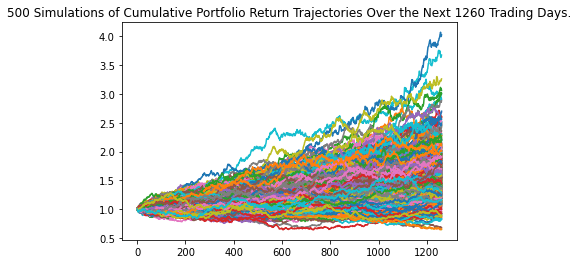

In [64]:
# Plot simulation outcomes
MC_fs_five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

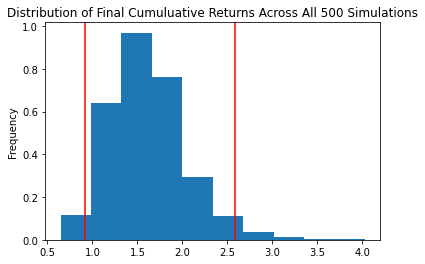

In [65]:
# Plot probability distribution and confidence intervals
MC_fs_five_years.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
fs_five_years_tbl = MC_fs_five_years.summarize_cumulative_return()

# Print summary statistics
print(fs_five_years_tbl)

count           500.000000
mean              1.615972
std               0.436269
min               0.645060
25%               1.313164
50%               1.574863
75%               1.842706
max               4.030074
95% CI Lower      0.915569
95% CI Upper      2.590404
Name: 1260, dtype: float64


In [67]:
# Set initial investment ***250% increase in initial investment!
initial_investment = (20000+(20000 * 1.5))

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(fs_five_years_tbl[8]*initial_investment,2)
ci_upper_five = round(fs_five_years_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,} and ${ci_upper_five:,}")

There is a 95% chance that an initial investment of $50,000.0 in the portfolio over the next 5 years will end within in the range of $45,778.44 and $129,520.21


### Ten Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_fs_ten_years = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*10
)

In [69]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_fs_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ddevii/Rutgers/Rutgers_Personal_Repo/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987157,0.998288,0.997096,0.996762,0.994370,1.000319,0.985905,1.006236,0.996681,0.993660,...,1.001484,1.010252,1.002459,0.989208,0.994246,1.003073,1.000047,0.998085,0.994072,1.011831
2,0.985196,0.997458,0.993951,0.990332,0.991638,0.996736,0.983920,1.009825,0.981742,0.990526,...,1.006110,1.013731,0.998419,0.987566,1.001629,1.004355,0.998946,1.006866,0.994473,1.019513
3,0.988773,0.999402,0.998214,0.997621,0.987939,0.997594,0.982856,1.009520,0.987825,1.000011,...,1.005646,1.028263,0.996505,0.983719,1.006622,1.014530,0.999519,1.021360,0.991039,1.014999
4,0.988074,1.001070,0.983428,1.002857,0.984078,1.007667,0.976156,1.010502,0.985393,0.996123,...,1.007287,1.033027,1.000444,0.985380,0.997950,1.007551,1.007369,1.011689,0.980484,1.017018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.833141,2.043881,3.769451,5.119489,2.804620,3.665507,1.841311,2.362502,1.999418,2.580788,...,1.639022,2.671457,4.196541,1.562213,2.887976,2.937038,3.727829,2.034622,2.942308,2.209046
2517,1.854201,2.027792,3.780468,5.171359,2.830757,3.651673,1.837063,2.372779,1.992059,2.581505,...,1.643773,2.671653,4.199272,1.551924,2.881911,2.942633,3.732486,2.032282,2.947396,2.197725
2518,1.854461,2.040630,3.778872,5.132129,2.843230,3.605461,1.838032,2.411058,1.998525,2.563316,...,1.649274,2.651959,4.214793,1.578771,2.888863,2.954069,3.753648,2.050573,2.973890,2.190408
2519,1.872376,2.057342,3.787407,5.147805,2.862162,3.617993,1.841722,2.397306,1.984141,2.567357,...,1.659486,2.674271,4.253919,1.580001,2.903045,2.925567,3.732621,2.045273,2.988982,2.177032


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

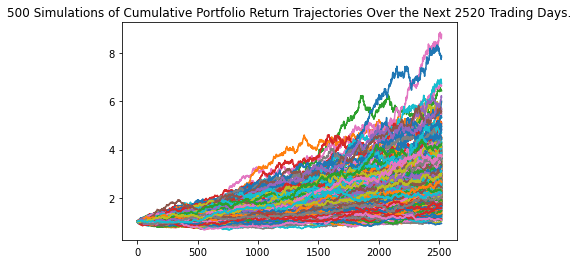

In [70]:
# Plot simulation outcomes
MC_fs_ten_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

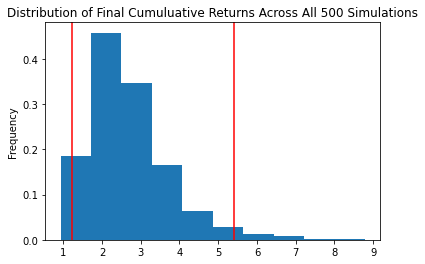

In [71]:
# Plot probability distribution and confidence intervals
MC_fs_ten_years.plot_distribution()

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
fs_ten_years_tbl = MC_fs_ten_years.summarize_cumulative_return()

# Print summary statistics
print(fs_ten_years_tbl)

count           500.000000
mean              2.684324
std               1.064286
min               0.930832
25%               1.906496
50%               2.494026
75%               3.169054
max               8.784821
95% CI Lower      1.217631
95% CI Upper      5.411347
Name: 2520, dtype: float64


In [73]:
# Set initial investment
ci_lower_ten = round(fs_ten_years_tbl[8]*initial_investment,2)
ci_upper_ten = round(fs_ten_years_tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,} and ${ci_upper_ten:,}")

There is a 95% chance that an initial investment of $50,000.0 in the portfolio over the next 10 years will end within in the range of $60,881.56 and $270,567.37


Write here the conclusions and compare the changes: DON"T FORGET!!!